# Exploratory Data Analysis - Retail dataset



**PROBLEM STATEMENT:**
    
Analyse the superstore dataset and detect the principal cost of lower profits in the store.

In [30]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To ignore warnings
import warnings as wg
wg.filterwarnings("ignore")

## Data pre-processing

In [31]:
#Read the data
df_retail=pd.read_csv("SampleSuperstore.csv")

In [32]:
df_retail.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [33]:
df_retail.shape

(9994, 13)

In [34]:
#Get more information about the dataset

df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


The superstore dataset consists of 9994 rows and 13 colums. The attributes of this dataset includes the following:         Categorical variables: Ship mode, segment, country, city, state, region, category, sub-category.
Non-categorical variables: Postal code, sales, quantity, discount, profit.

In [35]:
df_retail['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [36]:
df_retail['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [37]:
# Checking for null values

df_retail.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [38]:
# removing unnecessary columns from dataset
df_retail= df_retail.drop(columns=["Postal Code"])

In [39]:
df_retail.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [40]:
df_retail.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## Exploratory Data Analysis

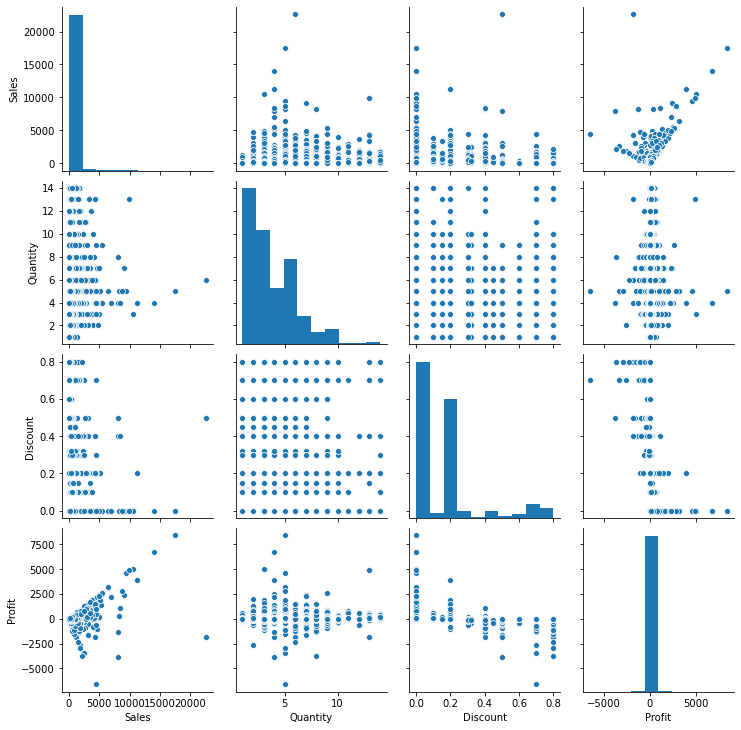

In [41]:
#describing dataset with the help of seaborn pairplot
sns.pairplot(df_retail)

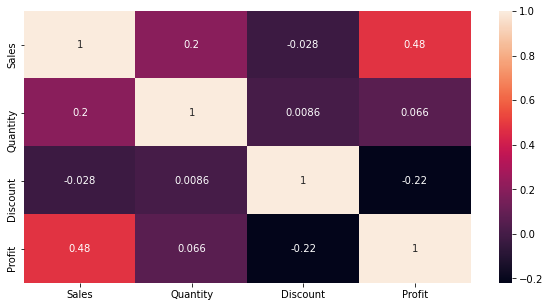

In [42]:
#finding correlation between the variables and visualizing with the help of heatmap

plt.figure(figsize=(10,5))
sns.heatmap(df_retail.corr(),annot=True)
plt.show()


From the above plots it is clear that sales are positively correlated to profit and inversely correlated with discount.
Hence, profit and discount are inversely correlated which makes sense more the discount less is the profit margin. 


<Figure size 720x576 with 0 Axes>

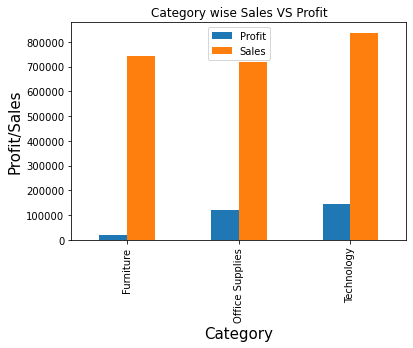

In [43]:
# Checking how profit and sales affect different categories of item sold

plt.figure(figsize=(10,8))
df_retail.groupby('Category')['Profit' , 'Sales' ].sum().plot.bar()
plt.xlabel('Category', fontsize=15)
plt.ylabel('Profit/Sales', fontsize=15)
plt.title("Category wise Sales VS Profit")
plt.show()

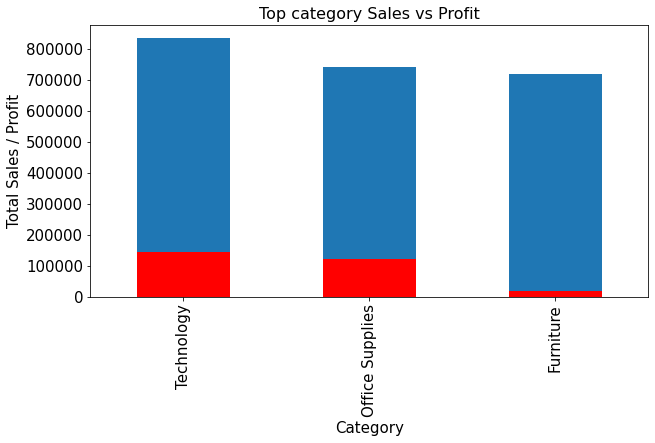

In [44]:
category_s = df_retail.groupby('Category').Sales.sum().nlargest(n=100)
category_p = df_retail.groupby('Category').Profit.sum().nlargest(n=100)

category_s.plot(kind='bar' , figsize=(10,5) , fontsize=15)
category_p.plot(kind='bar' , figsize=(10,5) , fontsize=15 , color='red')
plt.xlabel('Category',fontsize=15)
plt.ylabel('Total Sales / Profit',fontsize=15)
plt.title("Top category Sales vs Profit" , fontsize=16)
plt.show()

It is clear from the bar graph above that sales in technology is highest that is 8,50,000 USD and it brings maximum profit to the store which is approximately 1,50,000 USD.

It is clear, that furniture category has lowest profit to the store so more focus should be given to that department to boost the profit along with the sales.

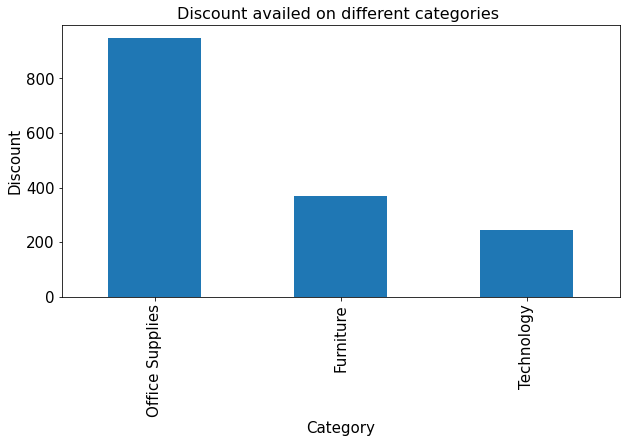

In [45]:
#plotting graph for of discount versus different categories

Category_d = df_retail.groupby('Category').Discount.sum().nlargest(n=100)

Category_d.plot(kind = 'bar' , figsize=(10,5),fontsize =15)
plt.xlabel('Category',fontsize=15)
plt.ylabel('Discount',fontsize=15)
plt.title('Discount availed on different categories ' , fontsize = 16 )
plt.show()

In terms of discount the category enjoying major discount is office supplies and the least discount is set on technology.

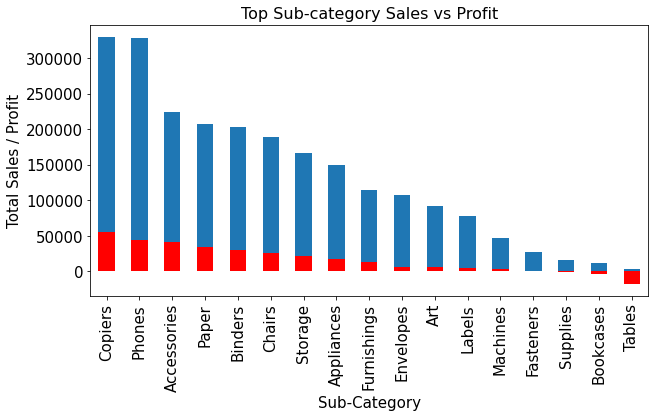

In [46]:
#Plotting profit and sales versus sub-categories

Sub_category_s = df_retail.groupby('Sub-Category').Sales.sum().nlargest(n=100)
Sub_category_p = df_retail.groupby('Sub-Category').Profit.sum().nlargest(n=100)

Sub_category_s.plot(kind='bar' , figsize=(10,5) , fontsize=15)
Sub_category_p.plot(kind='bar' , figsize=(10,5) , fontsize=15 , color='red')
plt.xlabel('Sub-Category',fontsize=15)
plt.ylabel('Total Sales / Profit',fontsize=15)
plt.title("Top Sub-category Sales vs Profit" , fontsize=16)
plt.show()

From the graph we can understand that category furniture includes sub-category: bookcases and tables which are in loss. The reason behind it being higher discounts allocated to large pricing items. 

Hence, discounts in the furniture department needs to be reduced by 10-20% leading to increase in profit for the store.

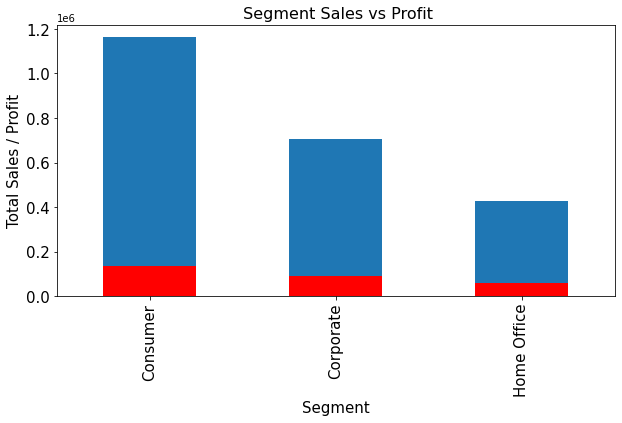

In [47]:
Segment_s = df_retail.groupby('Segment').Sales.sum().nlargest(n=100)
Segment_p = df_retail.groupby('Segment').Profit.sum().nlargest(n=100)

Segment_s.plot(kind='bar' , figsize=(10,5) , fontsize=15)
Segment_p.plot(kind='bar' , figsize=(10,5) , fontsize=15 , color='red')
plt.xlabel('Segment',fontsize=15)
plt.ylabel('Total Sales / Profit',fontsize=15)
plt.title(" Segment Sales vs Profit" , fontsize=16)
plt.show()

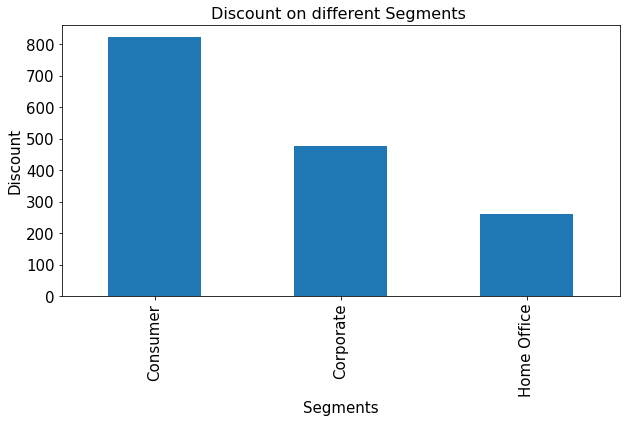

In [48]:
df_retail.groupby('Segment').Discount.sum().plot(kind = 'bar' , figsize=(10,5),fontsize =15)
plt.xlabel('Segments',fontsize=15)
plt.ylabel('Discount',fontsize=15)
plt.title('Discount on different Segments ' , fontsize = 16 )
plt.show()

The above graph shows that consumer segment is granted maximum discount as compared to other segments

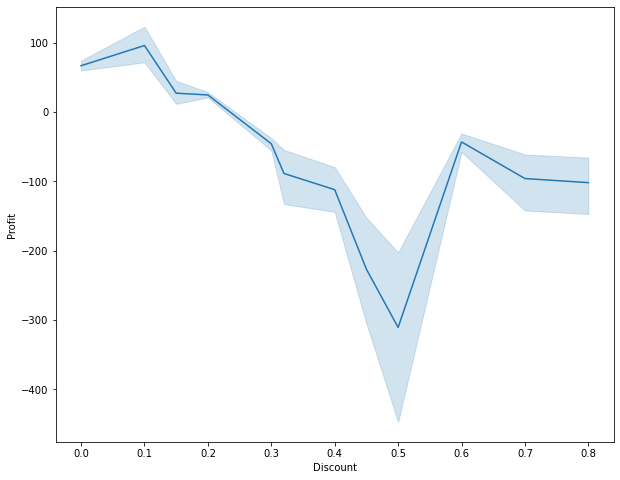

In [49]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Discount", y="Profit" ,data=df_retail)

As the discount increases more than 20% we enter in the zone of loss. So the curves declines sharply and hence optimum discounts should be given to increase the profitability of the store.

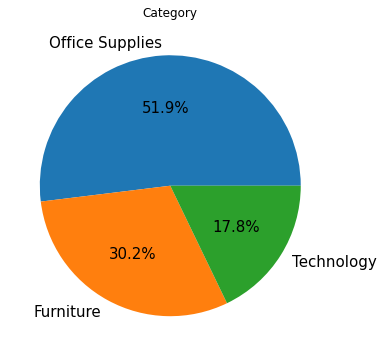

In [50]:
plt.figure(figsize = (6,6))
textprops = {'fontsize' : 15}
plt.title("Category")
plt.pie(df_retail['Segment'].value_counts() , labels = df_retail['Category'].value_counts().index , autopct = '%1.1f%%' , textprops=textprops)
plt.show()

The chart shows that 51.9% of items fall under the office supplies category, 30.2% under furniture and 17.8% under technology category. But most profit occur from the technology as they are big-ticket items.

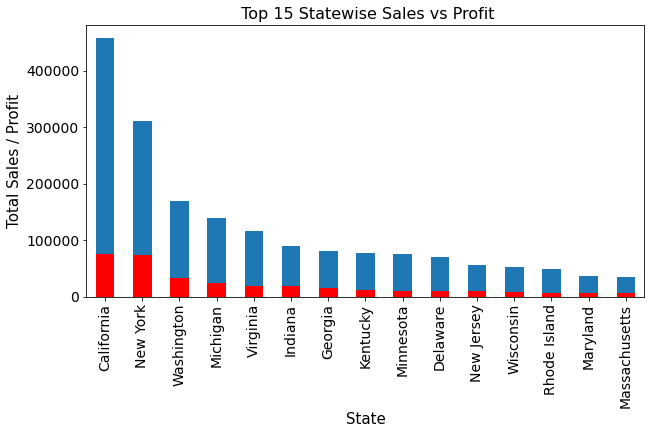

In [51]:
State_s = df_retail.groupby('State').Sales.sum().nlargest(n=15)
State_p = df_retail.groupby('State').Profit.sum().nlargest(n=15)

State_s.plot(kind='bar' , figsize=(10,5) , fontsize=14)
State_p.plot(kind='bar' , figsize=(10,5) , fontsize=14 , color='red')
plt.xlabel('State',fontsize=15)
plt.ylabel('Total Sales / Profit',fontsize=15)
plt.title(" Top 15 Statewise Sales vs Profit" , fontsize=16)
plt.show()

There are lower sales happening in Massachusetts, Maryland, Rhode Island, New Jersey, Delware which are mostly places lying in the east region of USA. So the profitability of east region needs to be uplifted.

## Calculating Cost and Profit in percentage

In [52]:
df_retail['Cost']=df_retail['Sales']-df_retail['Profit']
df_retail['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [53]:
df_retail['Profit %']=(df_retail['Profit']/df_retail['Cost'])*100

In [55]:
df_retail=df_retail.sort_values(['Profit %' , 'Sub-Category'] , ascending = False).groupby('Profit %').head(10)
df_retail

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,United States,Bayonne,New Jersey,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,United States,Summerville,South Carolina,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,United States,New York City,New York,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,United States,Lakeville,Minnesota,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,United States,San Francisco,California,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,United States,Austin,Texas,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,United States,Chicago,Illinois,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,United States,Pasadena,Texas,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


The above tables helps to understand which sub-category has 100% profits and which beared heavy loss. From the analysis, it is clear the copiers, phones,etc falling under technology enjoy maximum profits.

## CONCLUSION

1. We should focus on the furniture category as sales and profits are low. It should be discounted optimally to get rid of losses.
2. Divide discount in each three segments equally that is consumers, corporate and home office.
3. Eastern region of USA should be targetted with lucrative offers such that sales increase. 
4. Big ticket items like technology and furniture should be taken into consideration before deciding discounts as most of the profits are earned by them.
5. Optimal discounts 20-30% should be placed on the items such that profits plummet.
